# GRN formation

In [1]:
from grnet.clusters import CellClasses
from grnet.models import PC, PretrainedModel
from grnet.plot import grnplot
from grnet.toydata import load_dataset, load_metadata
import matplotlib.pyplot as plt

## data loading

In [2]:
data = load_dataset("prototype1")
meta = load_metadata("prototype1")

lst_data = [
    data.loc[meta.cluster == v, :].iloc[:, :5] for v in meta.cluster.unique()
]

## GRN formation with PC algorithm

In [3]:
models = [PC(v) for v in lst_data]

for v in models:
    v.estimate()

- edges are resturned as a list

In [4]:
models[0].estimate()
models[0].edges

[('gene_2', 'gene_4')]

- edge information can be represented as a GRN matrix

In [5]:
models[0].get_matrix()

,gene_1,gene_2,gene_3,gene_4,gene_5
gene_1,1.0,0.0,0.0,0.0,0.0
gene_2,0.0,1.0,0.0,1.0,0.0
gene_3,0.0,0.0,1.0,0.0,0.0
gene_4,0.0,0.0,0.0,1.0,0.0
gene_5,0.0,0.0,0.0,0.0,1.0


**Note**:
GRN matrices should fulfill the requirements as follows;
1. DxD matrix (where D: the number of genes, i.e., the number of columns)
2. rows names and columns names coincide each other
3. all elements are either 0 or 1
4. all diagonal elements are 1
5. if the GRN is an undirected graph, GRN matrix can be either upper/lower triangular

## Plotting GRN

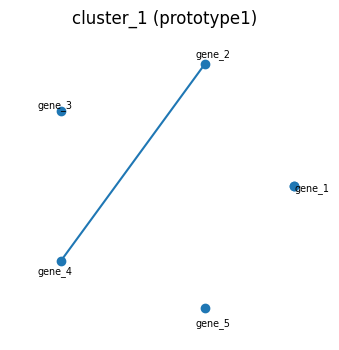

In [6]:
fig, ax = plt.subplots(figsize=(4, 4))

grnplot(models[0], ax=ax)

ax.set(title="cluster_1 (prototype1)");

## Generate `Estimator` Class from GRN matrices

- use `PretrainedModel` class

In [7]:
grn_mat = models[0].get_matrix()

pre = PretrainedModel(grn_mat)

- you can access to edges/matrix

In [8]:
pre.edges

[('gene_2', 'gene_4')]

In [9]:
pre.get_matrix()

,gene_1,gene_2,gene_3,gene_4,gene_5
gene_1,1.0,0.0,0.0,0.0,0.0
gene_2,0.0,1.0,0.0,1.0,0.0
gene_3,0.0,0.0,1.0,0.0,0.0
gene_4,0.0,0.0,0.0,1.0,0.0
gene_5,0.0,0.0,0.0,0.0,1.0


- for `self.data`, the GRN matrix will be returned

In [10]:
pre.data == pre.get_matrix()

,gene_1,gene_2,gene_3,gene_4,gene_5
gene_1,True,True,True,True,True
gene_2,True,True,True,True,True
gene_3,True,True,True,True,True
gene_4,True,True,True,True,True
gene_5,True,True,True,True,True


- `PretrainedModel` is also visualized by `grnplot` function

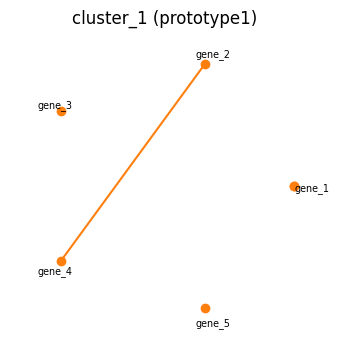

In [11]:
fig, ax = plt.subplots(figsize=(4, 4))

grnplot(pre, ax=ax, color="C1")

ax.set(title="cluster_1 (prototype1)");

## Handle all clusters in the dataset with CellClasses

- estimate GRNs for all models before assign to `CellClasses`

In [12]:
dataset = CellClasses(
    models=models,
    names=[f"cluster_{i + 1}" for i in range(len(lst_data))],
    colors="rainbow"
)

- you can visualize them by assigning cluster names or cluster ids

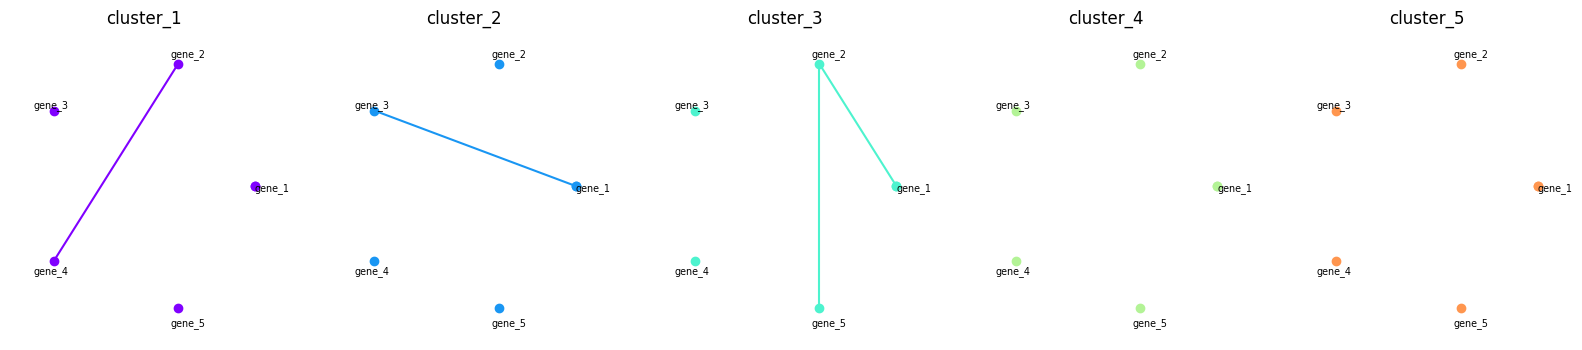

In [13]:
fig, ax = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    grnplot(dataset, ax=ax[i], id=f"cluster_{i + 1}")
    ax[i].set(title=dataset.names[i])